In [1]:
import pandas as pd
ac_temp = pd.read_csv('./lm_example.csv' , index_col=[0])
ac_temp.head()

,ルームエアコン所有数量,最高気温
北海道,344,27.0
青森県,1044,27.8
岩手県,1183,28.8
宮城県,1686,28.6
秋田県,1706,28.7


<Axes: xlabel='最高気温', ylabel='ルームエアコン所有数量'>

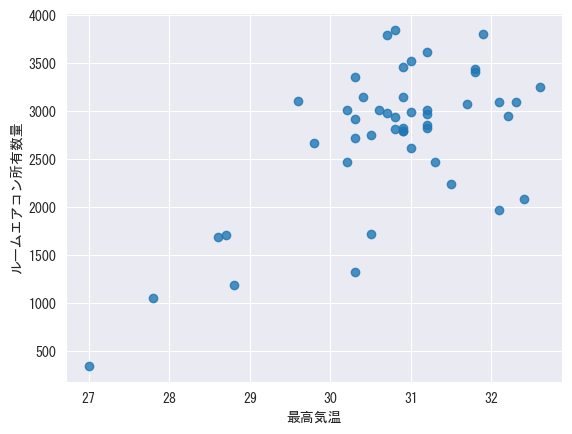

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# 図のスタイルをdarkgridにする
sns.set_style('darkgrid')
# 図に日本語が利用出来るようにする
plt.rcParams['font.family'] = 'MS Gothic'
%matplotlib inline

# label
sns.regplot(
    x=ac_temp.columns[1], #'最高気温',
    y=ac_temp.columns[0], #'ルームエアコン所有数量',
    data=ac_temp,
    fit_reg=False,
    label=ac_temp.index
)

In [5]:
import statsmodels.api as sm

explanatory_variable = sm.add_constant(ac_temp['最高気温'])
model = sm.OLS(
    endog=ac_temp['ルームエアコン所有数量'],
    exog=explanatory_variable
)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ルームエアコン所有数量   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     30.46
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.61e-06
Time:                        15:06:18   Log-Likelihood:                -365.33
No. Observations:                  47   AIC:                             734.7
Df Residuals:                      45   BIC:                             738.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.01e+04   2328.911     -4.339      0.000   -1.48e+04   -5413.680
最高気温         417.7945     75.704      5.519      0.000     265.319     570.270
==============================================================================
Omnibus:                        2.300   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.758
Skew:                          -0.473   Prob(JB):                        0.415
Kurtosis:                       3.036   Cond. No.                         837.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ 
Y = -1.01\times10^{4} + 417.7945X 
$$